In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
user = pd.read_csv('user level info.csv', encoding='latin-1')
movie = pd.read_csv('Movie details.csv', encoding='latin-1')
rating = pd.read_csv('Ratings.csv', encoding='latin-1')

In [5]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
movie.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
rating.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
print(user.columns)
user.columns = ['user_id ', 'age', 'gender', 'occupation', 'zip_code']
print(user.columns)

Index(['user id ', ' age ', ' gender ', ' occupation ', ' zip code'], dtype='object')
Index(['user_id ', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')


In [9]:
print(movie.columns)
movie.columns = ['movie_id', 'movie_title', 'release date', ' video release date ',
       'IMDb URL ', ' unknown ', ' Action ', ' Adventure ', ' Animation ',
       'Childrens ', ' Comedy ', ' Crime ', ' Documentary ', ' Drama ',
       ' Fantasy ', 'Film-Noir ', ' Horror ', ' Musical ', ' Mystery ',
       ' Romance ', ' Sci-Fi ', 'Thriller ', ' War ', ' Western ']
print(movie.columns)

Index(['movie id ', ' movie title ', ' release date ', ' video release date ',
       'IMDb URL ', ' unknown ', ' Action ', ' Adventure ', ' Animation ',
       'Children's ', ' Comedy ', ' Crime ', ' Documentary ', ' Drama ',
       ' Fantasy ', 'Film-Noir ', ' Horror ', ' Musical ', ' Mystery ',
       ' Romance ', ' Sci-Fi ', 'Thriller ', ' War ', ' Western '],
      dtype='object')
Index(['movie_id', 'movie_title', 'release date', ' video release date ',
       'IMDb URL ', ' unknown ', ' Action ', ' Adventure ', ' Animation ',
       'Childrens ', ' Comedy ', ' Crime ', ' Documentary ', ' Drama ',
       ' Fantasy ', 'Film-Noir ', ' Horror ', ' Musical ', ' Mystery ',
       ' Romance ', ' Sci-Fi ', 'Thriller ', ' War ', ' Western '],
      dtype='object')


In [10]:
print(rating.columns)
rating.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
print(rating.columns)

Index(['user id ', ' item id ', ' rating ', ' timestamp'], dtype='object')
Index(['user_id', 'movie_id', 'rating', 'timestamp'], dtype='object')


In [11]:
print(user.shape)
print(movie.shape)
print(rating.shape)

(943, 5)
(1682, 24)
(100000, 4)


In [12]:
# we can merge two dataframe since they are haivng one common column

movie_rating = pd.merge(rating,movie,on='movie_id')
print(movie_rating.shape)
print(movie_rating.head())

(100000, 27)
   user_id  movie_id  rating  timestamp   movie_title release date  \
0      196       242       3  881250949  Kolya (1996)    24-Jan-97   
1       63       242       3  875747190  Kolya (1996)    24-Jan-97   
2      226       242       5  883888671  Kolya (1996)    24-Jan-97   
3      154       242       3  879138235  Kolya (1996)    24-Jan-97   
4      306       242       5  876503793  Kolya (1996)    24-Jan-97   

    video release date                                         IMDb URL   \
0                   NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   
1                   NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   
2                   NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   
3                   NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   
4                   NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   

    unknown    Action   ...   Fantasy   Film-Noir    Horror    Musical   \
0          0         0  ...       

In [13]:
movie_rating.describe()

,user_id,movie_id,rating,timestamp,video release date,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,100000.00000,100000.000000,100000.000000,1.000000e+05,0.0,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860,8.835289e+08,NaN,0.0001,0.255890,0.137530,0.036050,0.071820,...,0.013520,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540
std,266.61442,330.798356,1.125674,5.343856e+06,NaN,0.0100,0.436362,0.344408,0.186416,0.258191,...,0.115487,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894
min,1.00000,1.000000,1.000000,8.747247e+08,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,254.00000,175.000000,3.000000,8.794487e+08,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,447.00000,322.000000,4.000000,8.828269e+08,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
75%,682.00000,631.000000,4.000000,8.882600e+08,NaN,0.0000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
max,943.00000,1682.000000,5.000000,8.932866e+08,NaN,1.0000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


In [14]:
# the average rating of movies is 3.52
# max. is 5 and 25 percentile is 3

In [15]:
n_users = movie_rating['user_id'].unique().shape[0]
n_items = movie_rating['movie_id'].unique().shape[0]

print(n_users,n_items)


943 1682


In [16]:
# new dataframe movie_stats

movie_stats = pd.DataFrame(movie_rating.groupby('movie_title')['rating'].mean()) 
movie_stats.sort_values(by='rating', ascending=False).head()

,rating
movie_title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [17]:
movie_stats['count_of_ratings'] = movie_rating.groupby('movie_title')['rating'].count()
movie_stats.sort_values(by='count_of_ratings',ascending=False).head()

,rating,count_of_ratings
movie_title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


Text(0.5, 0, 'count_of_ratings')

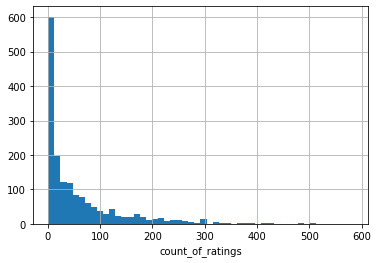

In [18]:
# plot a histogram for ratings

movie_stats['count_of_ratings'].hist(bins=50)
plt.xlabel('count_of_ratings')

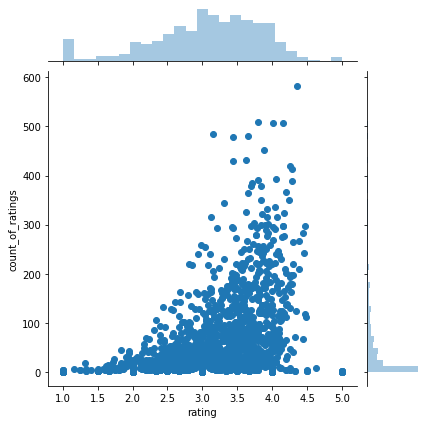

In [19]:
sns.jointplot(x='rating',y='count_of_ratings', data=movie_stats)

In [20]:
# movies with average ratings have higher count of ratings as compared to movie with low ratings

In [21]:
user_movie_rating = movie_rating.pivot_table(index='user_id',columns='movie_title',values='rating')
user_movie_rating.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [22]:
# now pick one movie

user_movie_rating['Air Force One (1997)']


user_id
1      NaN
2      4.0
3      2.0
4      5.0
5      NaN
6      NaN
7      4.0
8      NaN
9      NaN
10     NaN
11     3.0
12     4.0
13     1.0
14     NaN
15     4.0
16     5.0
17     NaN
18     NaN
19     NaN
20     NaN
21     3.0
22     NaN
23     NaN
24     4.0
25     NaN
26     4.0
27     NaN
28     NaN
29     3.0
30     NaN
      ... 
914    NaN
915    3.0
916    NaN
917    NaN
918    NaN
919    4.0
920    3.0
921    NaN
922    NaN
923    NaN
924    2.0
925    NaN
926    3.0
927    5.0
928    NaN
929    NaN
930    4.0
931    5.0
932    NaN
933    NaN
934    NaN
935    4.0
936    3.0
937    4.0
938    3.0
939    NaN
940    5.0
941    4.0
942    5.0
943    NaN
Name: Air Force One (1997), Length: 943, dtype: float64

In [23]:
similarity = user_movie_rating.corrwith(user_movie_rating['Air Force One (1997)'])
similarity.head()

movie_title
'Til There Was You (1997)    0.867722
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.221943
12 Angry Men (1957)          0.228031
187 (1997)                   0.294232
dtype: float64

In [24]:
corr_similar = pd.DataFrame(similarity,columns=['correlation'])
corr_similar.sort_values('correlation', ascending=False).head()

,correlation
movie_title,
Love and Death on Long Island (1997),1.0
Losing Chase (1996),1.0
Phat Beach (1996),1.0
My Crazy Life (Mi vida loca) (1993),1.0
Tetsuo II: Body Hammer (1992),1.0


In [25]:
corr_similar = corr_similar.join(movie_stats.count_of_ratings)
corr_similar.sort_values('correlation', ascending=False).head()

,correlation,count_of_ratings
movie_title,,
Love and Death on Long Island (1997),1.0,2
Losing Chase (1996),1.0,8
Phat Beach (1996),1.0,5
My Crazy Life (Mi vida loca) (1993),1.0,11
Tetsuo II: Body Hammer (1992),1.0,6


In [26]:
corr_similar[corr_similar['count_of_ratings']>50].sort_values('correlation', ascending=False).head()

,correlation,count_of_ratings
movie_title,,
Air Force One (1997),1.000000,431
Black Sheep (1996),0.766259,55
Copycat (1995),0.711744,86
Tales from the Crypt Presents: Bordello of Blood (1996),0.639372,55
Addicted to Love (1997),0.576379,54


In [27]:
def recommendation_correlation(x):
    r = user_movie_rating[x]
    similarity = user_movie_rating.corrwith(r)
    simi = pd.DataFrame(similarity,columns=['correlation'])
    simi_count = simi.join(movie_stats['count_of_ratings'])
    simi_count = simi_count[simi_count['count_of_ratings']>200]
    simi_count = simi_count.sort_values('correlation', ascending=False).head()
    return simi_count



In [28]:
recommendation_correlation('Air Force One (1997)')

,correlation,count_of_ratings
movie_title,,
Air Force One (1997),1.000000,431
"Hunt for Red October, The (1990)",0.554383,227
Murder at 1600 (1997),0.514906,218
Eraser (1996),0.500606,206
"Rock, The (1996)",0.493542,378


In [29]:
recommendation_correlation('Copycat (1995)')

,correlation,count_of_ratings
movie_title,,
"Game, The (1997)",0.748297,251
Air Force One (1997),0.711744,431
Volcano (1997),0.683115,219
Dante's Peak (1997),0.591444,240
Courage Under Fire (1996),0.557841,221


In [31]:
# cosine similarity


In [32]:
movie_cosine = movie_rating[['user_id','movie_id','rating']]
movie_cosine.head()

,user_id,movie_id,rating
0,196,242,3
1,63,242,3
2,226,242,5
3,154,242,3
4,306,242,5


In [33]:
# we are going to create a saprse matrix


In [34]:
data = movie_cosine.rating
row = movie_cosine.user_id
col = movie_cosine.movie_id

from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from scipy.sparse.linalg import svds

In [35]:
R = sparse.coo_matrix((data,(row,col))).tocsr()
print(R.shape)

(944, 1683)


In [36]:
find_similarities = cosine_similarity(R.T)
print(find_similarities.shape)

(1683, 1683)


In [37]:
def get_top5similarmovies(model, movie_id, n=5):
    return model[movie_id].argsort()[::-1][:n].tolist()

In [38]:
movie.head()

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
movie.iloc[4]

movie_id                                                                5
movie_title                                                Copycat (1995)
release date                                                     1-Jan-95
 video release date                                                   NaN
IMDb URL                http://us.imdb.com/M/title-exact?Copycat%20(1995)
 unknown                                                                0
 Action                                                                 0
 Adventure                                                              0
 Animation                                                              0
Childrens                                                               0
 Comedy                                                                 0
 Crime                                                                  1
 Documentary                                                            0
 Drama                                

In [40]:
movie.iloc[get_top5similarmovies(find_similarities,4)]

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4,5,Copycat (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
56,57,Priest (1994),1-Jan-94,NaN,http://us.imdb.com/M/title-exact?Priest%20(1994),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,205,Patton (1970),1-Jan-70,NaN,http://us.imdb.com/M/title-exact?Patton%20(1970),0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
174,175,Brazil (1985),1-Jan-85,NaN,http://us.imdb.com/M/title-exact?Brazil%20(1985),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
202,203,Unforgiven (1992),1-Jan-92,NaN,http://us.imdb.com/M/title-exact?Unforgiven%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# matrix factorization

In [41]:
user_movie_rating.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [42]:
df_matrix = user_movie_rating.fillna(0)

df_matrix.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


In [47]:
df_matrix.values.shape

(943, 1664)

In [52]:
normalized_values = df_matrix.values - np.mean(df_matrix.values,axis=1).reshape(-1,1)
normalized_values

array([[-0.58713942, -0.58713942,  1.41286058, ..., -0.58713942,
         3.41286058, -0.58713942],
       [-0.13581731, -0.13581731, -0.13581731, ..., -0.13581731,
        -0.13581731, -0.13581731],
       [-0.08834135, -0.08834135, -0.08834135, ..., -0.08834135,
        -0.08834135, -0.08834135],
       ...,
       [-0.05348558, -0.05348558, -0.05348558, ..., -0.05348558,
        -0.05348558, -0.05348558],
       [-0.19951923, -0.19951923, -0.19951923, ..., -0.19951923,
        -0.19951923, -0.19951923],
       [-0.34435096, -0.34435096, -0.34435096, ..., -0.34435096,
        -0.34435096, -0.34435096]])

In [54]:
from scipy.sparse.linalg import svds

u,sigma,vt = svds(normalized_values)
u.shape,sigma.shape,vt.shape

((943, 6), (6,), (6, 1664))

In [55]:
sigma = np.diag(sigma)     # making sigma a diagonal matrix

u.shape,sigma.shape,vt.shape

((943, 6), (6, 6), (6, 1664))

In [56]:
reconstructed_df = np.dot(np.dot(u,sigma),vt) + np.mean(df_matrix.values,axis=1).reshape(-1,1)

predictions_df = pd.DataFrame(reconstructed_df, columns = df_matrix.columns)
predictions_df.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
0,-0.008376,0.040828,0.255097,1.368637,0.086250,1.412191,0.490817,3.157662,-0.027797,0.324986,...,-0.028977,-0.003432,-0.017040,2.536312,1.662737,0.666667,0.670269,-0.049776,0.129188,-0.005724
1,0.038789,-0.044555,0.326952,0.133404,0.342076,0.530822,-0.318530,-0.024044,-0.020123,-0.082302,...,-0.040017,0.011209,-0.040759,-0.255696,-0.368808,-0.202552,0.224910,-0.004341,-0.026679,-0.021383
2,0.051939,0.008640,-0.154229,0.001675,0.373526,0.077553,-0.027438,0.008863,0.028092,-0.041838,...,0.014913,0.061333,0.014861,-0.246739,0.130785,0.059758,0.094154,-0.002092,0.058520,0.020152
3,0.016714,-0.009719,-0.007841,0.027480,0.235820,0.077210,0.039097,0.119632,0.002121,0.006895,...,-0.006565,0.021345,-0.004972,-0.104974,0.088231,0.028096,0.038567,-0.010205,0.026276,-0.005262
4,0.039749,0.064445,0.482236,0.667350,-0.026506,0.372200,0.780897,1.681404,0.040625,0.334868,...,0.051029,0.034790,0.060711,1.524330,1.131505,0.499319,0.068121,0.048664,0.122230,0.039145


In [58]:
def get_genres(in_df):
    df1 = in_df.iloc[:,5:24]
    df1 = df1.eq(1).dot(''+df1.columns.values).apply(lambda x:x.replace(' ','|').replace(' ','',1))
    return df1

def user_ratings(user_id,df):
    df1 = df[df['user_id']==user_id].sort_values(['rating'],ascending=False).copy()
    df2 = get_genres(df1)
    df3 = pd.concat([df1[['movie_title','rating']],df2],axis=1)
    df3 = df3.rename(columns={0:'genres'})
    return df3
        

In [59]:
user_ratings(100,movie_rating)

,movie_title,rating,genres
80568,Titanic (1997),5,|Action||Drama||Romance|
74972,As Good As It Gets (1997),5,|Comedy||Drama|
47235,Apt Pupil (1998),5,|Drama|
133,L.A. Confidential (1997),4,|Crime|Film-Noir||Mystery|
39589,Tomorrow Never Dies (1997),4,|Action||Romance|
99265,"Big Bang Theory, The (1994)",4,|Crime|
92445,Dark City (1998),4,Film-Noir||Sci-Fi|
86259,"Replacement Killers, The (1998)",4,|Action|
77534,"Postman, The (1997)",4,|Drama|
76290,Air Force One (1997),4,|Action|


In [60]:
def get_recommendations(user_id, number_of_recommendations=10):
    df1 = movie[movie['movie_id'].isin(movie_rating[movie_rating['user_id'] == user_id] \
                                       .sort_values(['rating'], ascending=False)['movie_id'])] \
                                        .merge(pd.DataFrame(predictions_df.iloc[user_id - 1].sort_values(ascending=False)) \
                                               .reset_index(),how='left', left_on='movie_title', right_on='movie_title') \
                                        .sort_values(user_id - 1, ascending=False) \
                                        .iloc[:number_of_recommendations, :]
    
    df2 = pd.concat([df1[['movie_title']], get_genres(df1)], axis=1)
    
    df2 = df2.rename(columns = {0:'genres'})
    
    return df2

In [61]:
get_recommendations(1)

,movie_title,genres
55,Pulp Fiction (1994),|Crime||Drama|
99,Fargo (1996),|Crime||Drama|Thriller|
11,"Usual Suspects, The (1995)",|Crime|Thriller|
97,"Silence of the Lambs, The (1991)",|Drama|Thriller|
6,Twelve Monkeys (1995),|Drama||Sci-Fi|
49,Star Wars (1977),|Action||Adventure||Romance||Sci-Fi||War|
173,Raiders of the Lost Ark (1981),|Action||Adventure|
167,Monty Python and the Holy Grail (1974),|Comedy|
171,"Empire Strikes Back, The (1980)",|Action||Adventure||Drama||Romance||Sci-Fi||War|
237,Raising Arizona (1987),|Comedy|
